<a href="https://colab.research.google.com/github/Jinstronda/research-papers-pytorch/blob/main/Fashion_Mnist_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torchvision

In [2]:
# Pytorch Computer Vision
# Torch Vision is the computer vision library
# torchvision.datasets - Tem todos os data sets
# torchvision.models - Tem modelos JA treinados.
# torchvision.transforms - Preparar as imagens para ser melhor com o modelo
# torch.utils.data.Dataset - Data Set Base para dados
# torch.utils.data.DataLoader - Create um iterable por um data set

In [3]:
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# 1. Getting a Data Set and Visualizing It
We will use a Fashion Mnist Data Set, that is a more complicated version of the normal Mnist data set for convolution Neural Networks
Pytorch give us a Data Set and then we can create a Data Loader with a specific Batch Size for It

In [4]:
# Getting Training Data
train_data = datasets.FashionMNIST(
    root = "data",
    train=True, # We are getting the training data
    download = True,
    transform = ToTensor(), # Automatically Transform into Tensors
    target_transform= None # How do we want to transform the y targets
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform= None
)

In [5]:
print(f"Train Data Size: {len(train_data)}, Test Data Size {len(test_data)}")

Train Data Size: 60000, Test Data Size 10000


In [6]:
print(f"Class Names: \n {train_data.classes}")
print(f" Class Indexes: \n {train_data.class_to_idx}")

Class Names: 
 ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
 Class Indexes: 
 {'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


In [7]:
image, label = train_data[0] # Getting One Image to check its shape
print(f"Image Shape: {image.shape}, Image Label: {label}")
#

Image Shape: torch.Size([1, 28, 28]), Image Label: 9


1 Color Channel (Grey), 28x28 Dimensions, Class is 9, Ankle Boot, Pytorch overview COLOR CHANNELS FIRST

# 2 . Some More Visualization

MatPlotLib only understand Color Channels after, but image is grey so we can just remove the Grey Channel

Text(0.5, 1.0, 'Ankle boot')

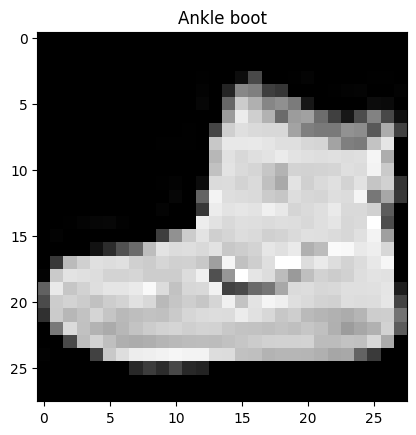

In [8]:
plt.imshow(image.squeeze(),cmap="grey")
plt.title(train_data.classes[label]) # Show Image and gets its label

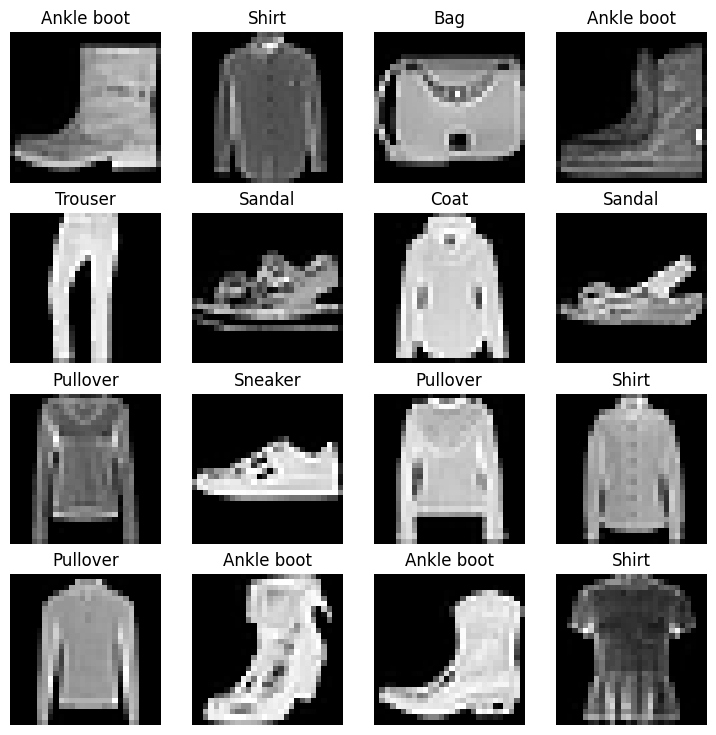

In [9]:
# Get Some Random Images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows,cols = 4,4
for i in range(1,rows*cols+1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item() # Use torch.randit instead of random library
  fig.add_subplot(rows,cols,i)
  img, label = train_data[random_idx]
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(train_data.classes[label])
  plt.axis(False)


Data is Kinda Weird, a lot of the images are weird. But lets see if we can make a better program than humans can do

# 3. Preparing a Dataloader
DataLoader will turn our data into mini batches for batch processing

In [10]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32 # HyperParameter
train_dataloader = DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)


In [11]:
print(f"Number of batches : {len(train_dataloader)}")
print(f"Number of Test Batches: {len(test_dataloader)}")


Number of batches : 1875
Number of Test Batches: 313


# Creating a BaseLine Model

In [12]:
class modelV0(nn.Module):
  def __init__(self,
               input_shape,
               hidden_units,
               output_shape):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)

    )

  def forward(self,x):
    return self.layer_stack(x)

In [13]:
device = "cuda" if torch.cuda.is_available else "cpu"
model_0 = modelV0(input_shape=784,
                  hidden_units = 10,
                  output_shape = 10).to(device)


In [14]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0275,  0.0053, -0.0167,  ..., -0.0060, -0.0241,  0.0349],
                      [-0.0072,  0.0142, -0.0319,  ..., -0.0047, -0.0304,  0.0081],
                      [ 0.0005,  0.0217,  0.0023,  ...,  0.0322,  0.0071,  0.0319],
                      ...,
                      [ 0.0025, -0.0126, -0.0093,  ...,  0.0163,  0.0224, -0.0069],
                      [ 0.0233, -0.0008, -0.0126,  ..., -0.0176, -0.0216,  0.0082],
                      [ 0.0110,  0.0066,  0.0330,  ...,  0.0307,  0.0238,  0.0122]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([-0.0257, -0.0120,  0.0228,  0.0321, -0.0169,  0.0152, -0.0084,  0.0227,
                      -0.0054, -0.0284], device='cuda:0')),
             ('layer_stack.2.weight',
              tensor([[-0.3130, -0.0118,  0.0932, -0.1864,  0.2488,  0.1500,  0.1907,  0.1457,
                       -0.3050, -0.0580],
                      [ 0

In [15]:
# 3.1 Optimizer

loss_f0 = nn.CrossEntropyLoss()
opt0 = torch.optim.Adam(lr=0.01,params = model_0.parameters())


In [16]:
import requests
from pathlib import Path

if Path("helper_funcitons.py").is_file():
  print("Already exists")
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)



In [17]:
!pip install torchmetrics

import torchmetrics

In [18]:
from torchmetrics.classification import MulticlassAccuracy

acc = MulticlassAccuracy(10)

In [19]:
# Creating a timer
from timeit import default_timer as timer
def print_train_time(start:float,
                     end: float,
                     device: torch.device = None):
  total_time = end-start
  print(f"Train time: {total_time:.3f} seconds")
  return total_time

start_time = timer()
end_time = timer()


# Conv Net
Creating a Convolutional Net for the Data Set

In [39]:
class CNN_model(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = 1,
                  out_channels= 10,
                  kernel_size = 3,
                  stride = 1,
                  padding= 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = 10,
                  out_channels = 10,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = 10,
                  out_channels= 10,
                  kernel_size = 3,
                  stride = 1,
                  padding= 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = 10,
                  out_channels = 10,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(

    nn.Flatten(),
    nn.Linear(in_features=490, out_features=10)  # Only 10 features now
  )

  def forward(self,x):
    x = self.conv_block_1(x)

    x = self.conv_block_2(x)

    x = self.classifier(x)

    return x


In [40]:
conv_model = CNN_model().to(device)


In [41]:
EPOCHS = 15
LR = 0.01
loss_f = nn.CrossEntropyLoss()
opt = torch.optim.Adam(conv_model.parameters(),lr=LR)
loss_list = []
epoch_list = []

In [43]:
from tqdm import tqdm
for epoch in range(EPOCHS):
  conv_model.train()
  running_loss = 0.0
  for mini_batch in tqdm(train_dataloader,desc= f"Epoch:{epoch}",ncols=100):
    opt.zero_grad()

    inputs, labels = mini_batch
    inputs, labels = inputs.to(device), labels.to(device)
    y_pred = conv_model(inputs)
    loss = loss_f(y_pred,labels)
    running_loss += loss.item()
    loss.backward()
    opt.step()
  if epoch % 2 == 0:
      avg_loss = running_loss / len(train_dataloader)
      loss_list.append(avg_loss)
      epoch_list.append(epoch)
      print(f"Epoch {epoch} Loss {avg_loss:.2f}")



Epoch:0: 100%|█████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 170.05it/s]


Epoch 0 Loss 0.39


Epoch:2: 100%|█████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.77it/s]


Epoch 2 Loss 0.35


Epoch:4: 100%|█████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 167.45it/s]


Epoch 4 Loss 0.34


Epoch:6: 100%|█████████████████████████████████████████████████| 1875/1875 [00:10<00:00, 174.27it/s]


Epoch 6 Loss 0.36


Epoch:8: 100%|█████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.53it/s]


Epoch 8 Loss 0.35


Epoch:10: 100%|████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.58it/s]


Epoch 10 Loss 0.35


Epoch:12: 100%|████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 167.50it/s]


Epoch 12 Loss 0.35


Epoch:14: 100%|████████████████████████████████████████████████| 1875/1875 [00:10<00:00, 175.65it/s]

Epoch 14 Loss 0.34


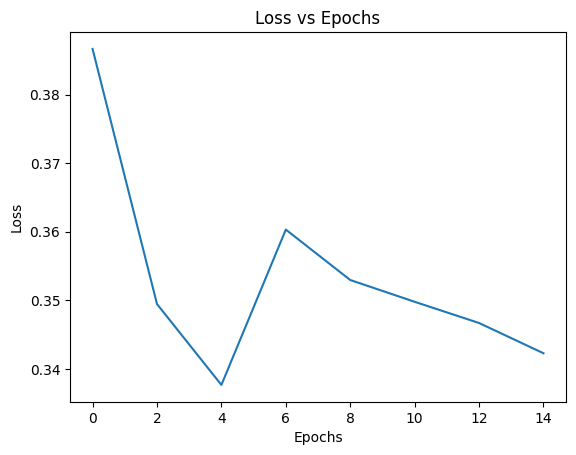

In [44]:
plt.plot(epoch_list,loss_list)
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [48]:
accuracy_metric = torchmetrics.Accuracy(task="multiclass", num_classes=10).to(device)
conv_model.eval()
with torch.no_grad():
  for inputs,labels in test_dataloader:
    inputs, labels = inputs.to(device),labels.to(device)
    y_pred = conv_model(inputs)
    accuracy_metric.update(y_pred, labels)

test_final_accuracy = accuracy_metric.compute()
print(f"Test Accuracy: {test_final_accuracy:.2f}")
accuracy_metric.reset()
with torch.no_grad():
  for inputs,labels in train_dataloader:
    inputs, labels = inputs.to(device), labels.to(device)
    y_pred = conv_model(inputs)
    accuracy_metric.update(y_pred, labels)
train_final_accuracy = accuracy_metric.compute()
print(f"Train Accuracy: {train_final_accuracy:.2f}")

Test Accuracy: 0.87
Train Accuracy: 0.88


# Final Results Evaluation
87% Of Acuracy on test Set
and
88% Accuracy on training set, a bit of overfitting but not something very worrying for a complex data set, want to take a lot at the Confusion Matrix to check some of the images it got wrong
Performance went up by 10% just by removing the last layer that was compressing the features, compressing features takes a LOT of the precision

In [52]:
from torchmetrics import ConfusionMatrix
cMatrix = ConfusionMatrix(task="multiclass",num_classes = 10).to(device)

In [53]:
cMatrix(y_pred,labels)

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 6, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 3, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 5, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 5, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 3]], device='cuda:0')

It seems most of the errors where on the classes with not a lot of data


In [65]:
with torch.no_grad():
  for inputs,labels in test_dataloader:
    inputs, labels = inputs.to(device),labels.to(device)
    y_pred = conv_model(inputs)
    accuracy_metric.update(y_pred, labels)
results = cMatrix(y_pred,labels)

One errror on Class 4, confusing it with class 2, it makes sense as class 4 only have one data that the model was able to use. (Also we are only looking at one of the mini batches)

In [56]:
import mlxtend # Data Science Library


In [59]:
from mlxtend.plotting import plot_confusion_matrix

# Plot Conf Matrix Visualization

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

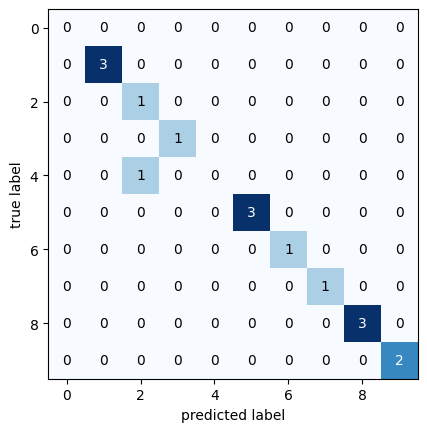

In [70]:
plot_confusion_matrix(results.to("cpu").numpy())

In [79]:
# Now will try to pass the Whole Data to the Model and then see the ConfMatrix
y_pred = []
y_exp = []
with torch.no_grad():
    for inputs,labels in test_dataloader:
        inputs = inputs.to(device)
        outputs = conv_model(inputs)
        y_pred.append(outputs)
        y_exp.append(labels.to(device))

# Concatenate all predictions into a single tensor
y_pred = torch.cat(y_pred, dim=0)
y_exp = torch.cat(y_exp,dim=0)

In [77]:
y_pred[0:5]

tensor([[ -5.5549, -11.2716,  -4.5173,  -5.3512,  -7.4911,   5.4629,  -4.4544,
           7.5636,  -4.4322,  12.7209],
        [ -1.9685,  -7.6850,   7.1950,  -4.3890,  -0.6741, -17.4112,   0.2758,
         -18.0905,  -7.8909, -16.6284],
        [ -2.3252,  15.7361,  -5.7737,   0.0794,  -1.2344,  -9.5937,  -3.2153,
          -7.3463,  -4.5528,  -7.3096],
        [ -3.3711,  15.1996,  -6.0629,   5.1054,   0.5398, -11.3212,  -2.3306,
         -10.1179,  -7.5346, -10.5315],
        [  1.8955,  -6.1698,   2.2224,  -2.3545,   0.4471, -18.2536,   3.8576,
         -15.3293,  -5.2852, -15.6536]], device='cuda:0')

In [81]:
results2 = cMatrix(y_pred,y_exp)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

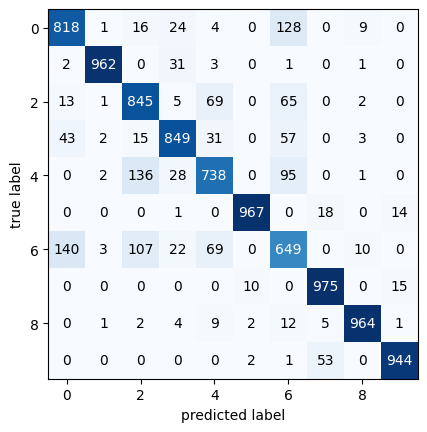

In [82]:
plot_confusion_matrix(results2.to("cpu").numpy())

Most of the Mistakes at Class 6 with Class 0 and class 6 with class 2, also Class 4 with class 2

In [86]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME = "Conv_model01"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
torch.save(obj=conv_model.state_dict(),
           f = MODEL_SAVE_PATH)